<a href="https://colab.research.google.com/github/0yash4/Google-Colab/blob/main/Linear_Regression_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression from Scratch Including Gradient Descent.
## First It'll be just Simple Linear Regression with Gradient Descent and after that with Multiple Linear Regression with features to read from a CSV file maybe.
## Only 2 external Libraries used Numpy and Matplotlib

### Note to self:- I've seen multiple youtube videos where guys are explaining on how to code Linear Regression from Scratch in smaller dimensions. But my end goal here will be to create/mimic the SK Learn one where you can use its LR in nth dimensions

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from dataclasses import dataclass

# Ordinary Least Square(OLS)
## Linear Regression  => $y_i = \beta_0 + \beta_i x_i $
## Error Function = $ Σ(y_i + ŷ_i)^2 $
### Finalised Matrix function after Derivating it to find the Minima is =>
### $ β = (XᵀX)^-1 * XᵀY $


In [4]:
# Simple linear regression class
@dataclass
class SimpleLinearRegression:
    def __init__(self):
        # Initialize slope and intercept coefficients
        self.m = None
        self.b = None

    # Fit the model using training data
    def fit(self, x_train, y_train):
        num = 0  # Initialize numerator for slope calculation
        den = 0  # Initialize denominator for slope calculation

        # Iterate over each data point for calculating slope and intercept
        for i in range(x_train.shape[0]):
            # Calculate numerator and denominator for slope
            num += (x_train[i] - x_train.mean()) * (y_train[i] - y_train.mean())
            den += (x_train[i] - x_train.mean()) ** 2

        # Calculate slope (m) and intercept (b)
        self.m = num / den
        self.b = y_train.mean() - (self.m * x_train.mean())
        return self.m, self.b

    # Predict the output for test data
    def predict(self, x_test):
        y_pred = []  # Initialize list to store predicted values
        for i in range(x_test.shape[0]):
            # Predict the output using the linear equation (y = mx + b)
            y_pred.append(self.m * x_test[i] + self.b)
        return np.array(y_pred)  # Return predicted values as numpy array

# Multiple linear regression class
class MultipleLinearRegression:
    def __init__(self):
        # Initialize coefficients for multiple linear regression
        self.coeff_ = None
        self.intercept_ = None

    # Fit the model using training data
    def fit(self, x_train, y_train):
        x_train = np.insert(x_train, 0, 1, axis=1)  # Insert column of ones for intercept

        # Calculate coefficients using normal equation
        beta = np.linalg.inv(np.dot(x_train.T, x_train)).dot(x_train.T).dot(y_train)

        # Extract intercept and coefficients
        self.intercept_ = beta[0]
        self.coeff_ = beta[1:]

        return self.intercept_, self.coeff_

    # Predict the output for test data
    def predict(self, x_test):
        # Calculate predicted values using dot product of test data and coefficients
        x_pred = np.dot(x_test, self.coeff_) + self.intercept_
        return x_pred

# Class to calculate accuracy metrics
class Accuracy:
    def __init__(self):
        # Initialize sum of squared errors for residuals and total
        self.SSEr = None
        self.SSEm = None

    # Calculate R-squared score
    def r2_score(self, y_true, y_pred):
        self.SSEr = 0  # Initialize sum of squared errors for residuals
        self.SSEm = 0  # Initialize sum of squared errors for total

        # Calculate sum of squared errors
        for i in range(y_true.shape[0]):
            self.SSEr += (y_true[i] - y_pred[i]) ** 2
            self.SSEm += (y_true[i] - y_true.mean()) ** 2

        # Calculate R-squared score
        r2_score = 1 - (self.SSEr / self.SSEm)
        return r2_score  # Return R-squared score


In [ ]:
df1 = pd.read_csv("/content/sample_data/california_housing_test.csv")
df1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [ ]:
x_df1 = df1.iloc[:, :-1].values
y_df1 = df1.iloc[:, -1:].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
              x_df1, y_df1, test_size=0.33, random_state=42)

In [ ]:
mlr = MultipleLinearRegression()
m, b = mlr.fit(x_train, y_train)
m,b

(array([-3531887.86094697]),
 array([[-4.21103906e+04],
        [-4.18698541e+04],
        [ 1.20079087e+03],
        [-8.16146276e+00],
        [ 8.91475499e+01],
        [-3.88772190e+01],
        [ 7.11649736e+01],
        [ 3.99176400e+04]]))

In [ ]:
y_pred = mlr.predict(x_test)
y_pred

array([[ 124245.53938296],
       [ 142482.43132874],
       [ 245497.81590884],
       [ 205624.18966314],
       [ 193200.23890909],
       [ 173827.27809845],
       [ 229835.82317991],
       [ 162611.40857395],
       [  67332.12220574],
       [ 199759.78161716],
       [ 160594.1171636 ],
       [ 219180.71470158],
       [  31753.17424853],
       [ 270752.02833344],
       [ 137499.99224864],
       [ 345285.42672901],
       [  27393.47992224],
       [ 115984.80854656],
       [ 340376.365758  ],
       [ 238328.04717239],
       [ 249935.24236648],
       [ 173011.02279782],
       [ 363194.29703124],
       [ 120618.05086371],
       [ 150808.02112469],
       [ 254641.32740878],
       [ 209360.01371373],
       [  53451.82637928],
       [ 304536.34445969],
       [ 152445.49812085],
       [ 334549.6566614 ],
       [ 119718.15629613],
       [ 124666.25987054],
       [ 260750.19913981],
       [ 206136.63853658],
       [ 331774.9245712 ],
       [ 157305.00780628],
 

In [ ]:
acc = Accuracy()
acc.r2_score(y_test, y_pred)

array([0.60343456])

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6034345648733019

# Stochastic Gradient Descent Linear Regression OR SGDRegressor
### Sklearn has seperate ML algo named SGDRegressor that uses Gradient Descent instead of OLS method

### Linear Regression  => $y_i = \beta_0 + \beta_i x_i $
### Error Function = $ Σ(y_i + ŷ_i)^2 $

<ipython-input-39-cc582633c55a>:26: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(current_pos[0], current_pos[1])
<ipython-input-39-cc582633c55a>:26: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(current_pos[0], current_pos[1])


AttributeError: 'function' object has no attribute 'HTML'

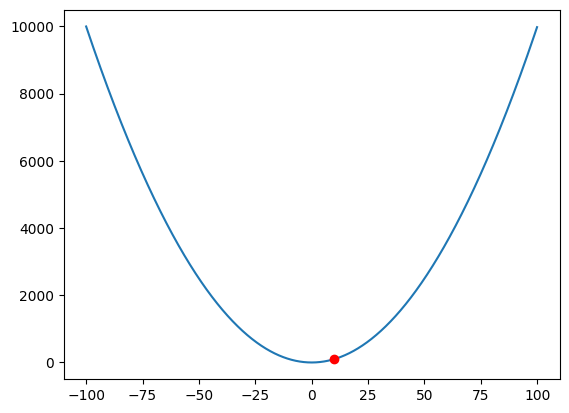

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.animation as animation

def y_function(x):
    return x**2

def y_derivative(x):
    return 2*x

x = np.arange(-100, 100, 0.1)
y = y_function(x)

current_pos = (80, y_function(80))
learning_rate = 0.01

fig, ax = plt.subplots()
ax.plot(x, y)
point, = ax.plot([], [], 'ro')

def animate(frame):
    global current_pos
    new_x = current_pos[0] - learning_rate * y_derivative(current_pos[0])
    new_y = y_function(new_x)
    current_pos = (new_x, new_y)
    point.set_data(current_pos[0], current_pos[1])
    return point,

ani = animation.FuncAnimation(fig, animate, frames=100, interval=50, blit=True)

# converting to an html5 video
video = ani.to_html5_video()

# embedding for the video
html = display.HTML(video)

# draw the animation
display.display(video)
plt.close()
